# TAREA 6

___EJERCICIO 1___

In [2]:
#importando librerias 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importando csv
df = pd.read_csv('DelayedFlights.csv', sep=",", dayfirst=True)

# eliminando primera columna
df = df.drop('Unnamed: 0', 1)

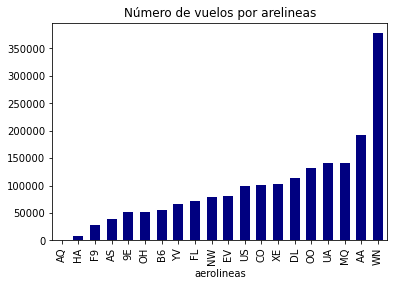

In [3]:
# creación de visualización con variable categorica

df.groupby('UniqueCarrier')['Year'].count().sort_values().plot(kind='bar', color='#000080', width =0.6);
plt.xlabel('aerolineas')
plt.ylabel('')
plt.title('Número de vuelos por arelineas');
plt.savefig('n_vuelos_aerolinea.png')


In [4]:
#agrupacion arrdelay
import numpy as np
df['Retrasos']=np.where(df['ArrDelay']>0,'tarde','temprano')

df.head(5)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Retrasos
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,temprano
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,tarde
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,tarde
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,tarde
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,tarde


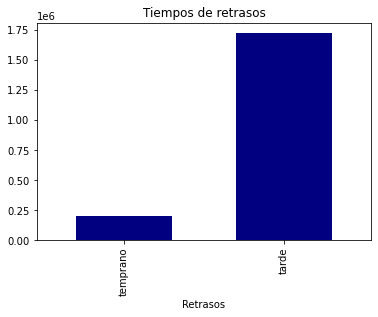

In [10]:
# creación de visualización con variable númerica a categorica

df.groupby('Retrasos')['ArrDelay'].count().sort_values().plot(kind='bar', color='#000080', width =0.6)

plt.xlabel('Retrasos')
plt.ylabel('')
plt.title('Tiempos de retrasos');
plt.savefig('n_variable_numerica.png')

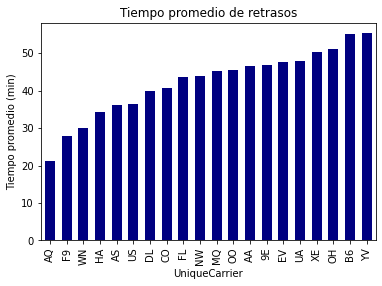

In [5]:
df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values().plot(kind='bar', color='#000080', width =0.6);
plt.ylabel('Tiempo promedio (min)')

plt.title('Tiempo promedio de retrasos');

plt.savefig('retrasos_aerolinea.png')

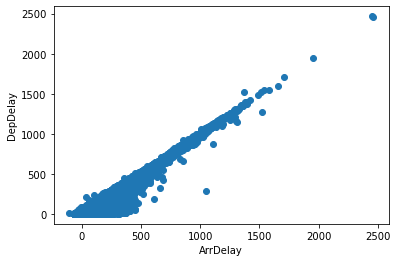

In [6]:
plt.scatter(df['ArrDelay'],df['DepDelay'])

plt.xlabel('ArrDelay')
plt.ylabel('DepDelay')
plt.title('');
plt.savefig('tiempo_llega_x_salida.png')

In [7]:
import seaborn as sns

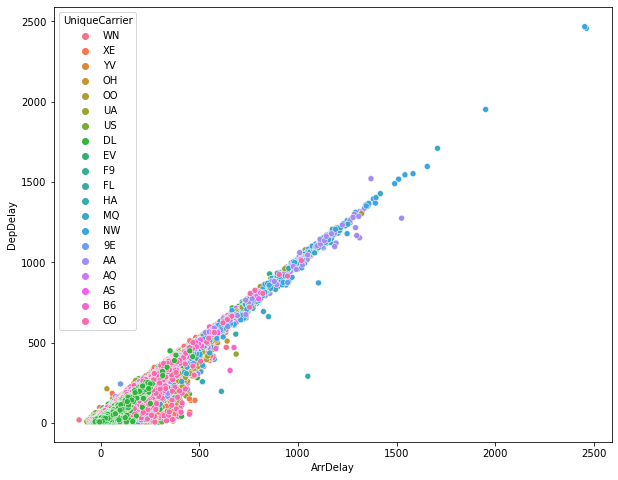

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='ArrDelay', y='DepDelay', hue='UniqueCarrier', data=df)
plt.savefig('3n_variables.png')

<ipython-input-9-8124d1e3c806>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby('UniqueCarrier')['ArrDelay', 'DepDelay', 'AirTime'].mean()


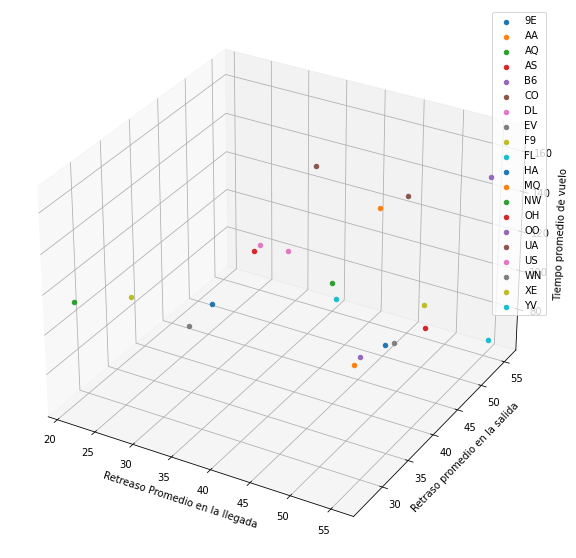

In [9]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

df2 = df.groupby('UniqueCarrier')['ArrDelay', 'DepDelay', 'AirTime'].mean()


X = df2['ArrDelay']
Y = df2['DepDelay']
Z = df2['AirTime']

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

n = 100

for xs, ys, zs in zip(X, Y, Z):
    ax.scatter(xs, ys, zs)

ax.set_xlabel('Retreaso Promedio en la llegada')
ax.set_ylabel('Retraso promedio en la salida')
ax.set_zlabel('Tiempo promedio de vuelo')

ax.legend(labels=df2.reset_index()['UniqueCarrier'])

plt.savefig('4n_variables.png')